# Supervised Machine Learning: Regression

* price: price in US dollars (\$326–\$18,823)
* carat: weight of the diamond (0.2–5.01)
* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color: diamond colour, from D (best) to J (worst)
* clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x: length in mm (0–10.74)
* y: width in mm (0–58.9)
* z: depth in mm (0–31.8)
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)
* table: width of top of diamond relative to widest point (43–95)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

diamonds = sns.load_dataset('diamonds')

from sklearn.model_selection import train_test_split
X = diamonds.drop(columns=['price'])
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
34530,0.33,Ideal,G,VVS1,62.0,56.0,4.45,4.48,2.77
26173,2.00,Very Good,I,VS2,59.5,62.0,8.13,8.21,4.86
20038,0.30,Good,H,SI1,63.4,58.0,4.21,4.24,2.68
41661,0.54,Ideal,J,VVS1,62.2,54.0,5.23,5.25,3.26
42306,0.41,Premium,D,VVS2,62.5,58.0,4.72,4.75,2.96


In [ ]:
a

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 7])
a.reshape(-1, 3)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 7]])

In [ ]:
a 

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## 1st iteration: dummy model and linear regression + regression errors

### Dummy model

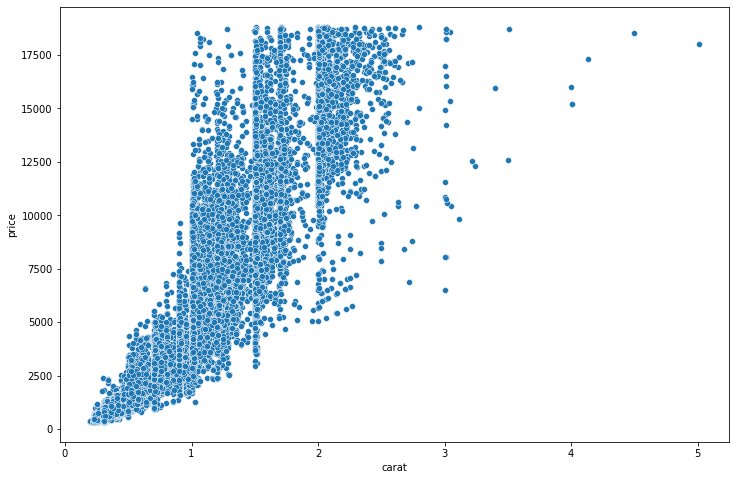

In [ ]:
plt.subplots(figsize=(12, 8))
sns.scatterplot(x=X_train['carat'], y=y_train)
plt.show()

Based on the graph below I am going to create a real simple model:

$$
price = carat*4000
$$

In [ ]:
def my_dummy_model(carat): 
    return carat * 4000

dummy_model_res = (
X_train
    .assign(
        preds = lambda x: my_dummy_model(x['carat']), 
        price = y_train
        )
    .assign(
        error = lambda x:  x['preds'] - x['price']
    )
)
dummy_model_res

,carat,cut,color,clarity,depth,table,x,y,z,preds,price,error
34530,0.33,Ideal,G,VVS1,62.0,56.0,4.45,4.48,2.77,1320.0,868,452.0
26173,2.00,Very Good,I,VS2,59.5,62.0,8.13,8.21,4.86,8000.0,15510,-7510.0
20038,0.30,Good,H,SI1,63.4,58.0,4.21,4.24,2.68,1200.0,421,779.0
41661,0.54,Ideal,J,VVS1,62.2,54.0,5.23,5.25,3.26,2160.0,1239,921.0
42306,0.41,Premium,D,VVS2,62.5,58.0,4.72,4.75,2.96,1640.0,1295,345.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10376,1.20,Premium,J,SI1,58.5,61.0,6.95,6.89,4.05,4800.0,4778,22.0
34949,0.31,Ideal,I,SI2,61.0,56.0,4.39,4.43,2.69,1240.0,379,861.0
18417,1.24,Premium,D,SI1,62.4,59.0,6.86,6.82,4.27,4960.0,7486,-2526.0
25940,2.01,Premium,G,SI1,61.8,59.0,8.15,8.09,5.02,8040.0,15105,-7065.0


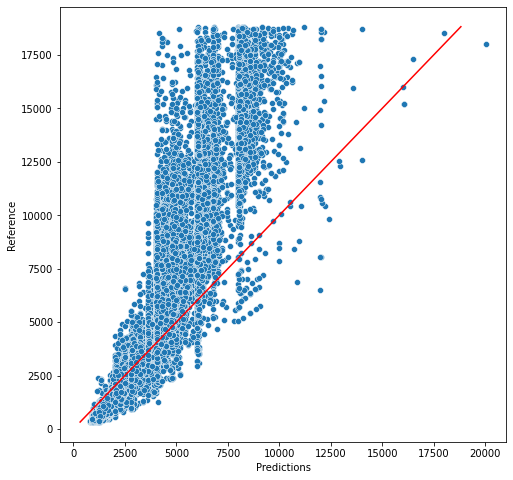

In [ ]:
def plot_predictions(y_true, y_pred): 
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = min([min(y_pred.tolist()), min(y_true.tolist())])
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.show()

plot_predictions(dummy_model_res['price'], dummy_model_res['preds'])

### Creating our first Linear Model

In [ ]:
np.array(X_train['carat']).reshape(-1, 1)

array([[0.33],
       [2.  ],
       [0.3 ],
       ...,
       [1.24],
       [2.01],
       [0.82]])

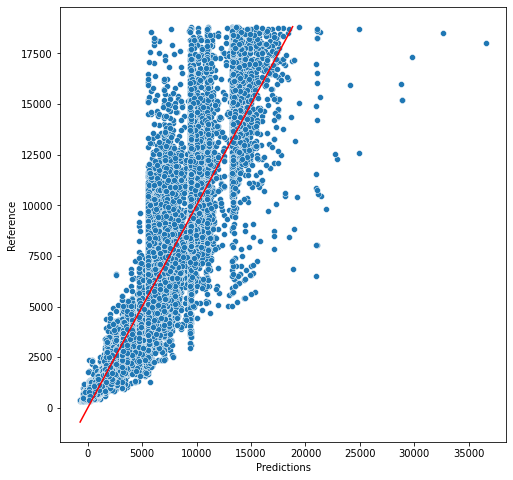

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(np.array(X_train['carat']).reshape(-1, 1), y_train)
plot_predictions(y_train, lm.predict(np.array(X_train['carat']).reshape(-1, 1)))

In [ ]:
print(
    lm.coef_, 
    lm.intercept_
    )

[7752.35768657] -2254.5185037319475


Linear model: 

$$
price = -2254.5185037319566 + carat * 7752.35768657
$$

### Results on test set

In [ ]:
results = pd.DataFrame({
    'predictions':lm.predict(np.array(X_test['carat']).reshape(-1, 1)), 
    'true_values':y_test
})
results.head() 

,predictions,true_values
43149,2086.801801,1389
50113,1699.183916,2209
49263,3172.131877,2088
9661,5575.362760,4642
8500,6428.122105,4422


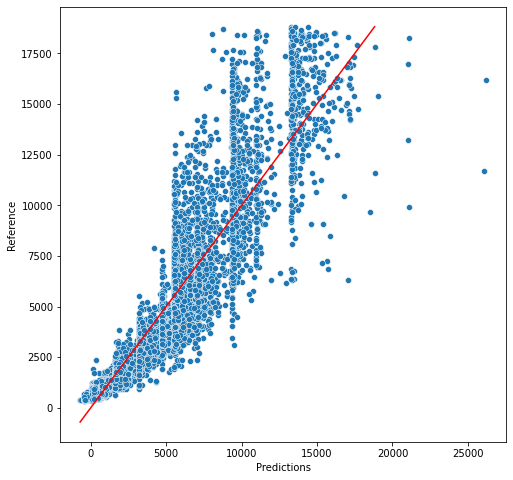

In [ ]:
plot_predictions(results.true_values, results.predictions)

* Mean Squared Error (MSE): is calculated as the mean or average of the squared differences between predicted and expected target values.
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - y_{e})^{2}$$

In [ ]:
mse_pre = (results
               .assign(diff = lambda x: (x.true_values - x.predictions)**2)
               .agg({'diff':{'sum','count'}}))
mse = mse_pre.loc['sum'] / mse_pre.loc['count']
mse

diff    2.367452e+06
dtype: float64

In [ ]:
# check our results with sklearn metrics
mod_res = {}
mod_res['1st_iter'] = {}
from sklearn.metrics import mean_squared_error
mod_res['1st_iter']['mse'] = mean_squared_error(results.true_values, results.predictions)
mod_res['1st_iter']['mse']

2367452.0177661614

* Root Mean Squared Error (RMSE): 
$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - y_{e})^{2}}$$

In [ ]:
rmse = (mse_pre.loc['sum'] / mse_pre.loc['count'])**0.5
rmse

diff    1538.652663
dtype: float64

In [ ]:
# check our results with sklearn metrics
mod_res['1st_iter']['rmse'] = mean_squared_error(results.true_values, results.predictions)**0.5
mod_res['1st_iter']['rmse']

1538.6526631329637

* Mean Absolute Error (MAE)
$$MAE = \frac{1}{n}\sum_{i=1}^{n} |y_{i} - y_{e}|$$

In [ ]:
mae_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions))
               .agg({'diff':{'sum','count'}}))
mod_res['1st_iter']['mae'] = mae_pre.loc['sum'] / mae_pre.loc['count']
mod_res['1st_iter']['mae']

diff    1010.730354
dtype: float64

In [ ]:
# check our results with sklearn metrics
from sklearn.metrics import mean_absolute_error
mod_res['1st_iter']['mae'] = mean_absolute_error(results.true_values, results.predictions)
mod_res['1st_iter']['mae']

1010.730353672055

* Mean Absolute Percentage Error (MAPE)

$$MAPE = \frac{1}{n}\sum_{i=1}^{n} |\frac{y_{i} - y_{e}}{y_{i}}|$$

In [ ]:
# Given that MAPE (mean absolute percentage error) doesn't exist in this version of sklearn, let's write a function:
def mean_abs_perc_error(y_true, y_pred):
    results = pd.DataFrame({
        'predictions':y_pred,
        'true_values':y_true
    })
    mape_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions)/x.true_values)
               .agg({'diff':{'sum','count'}}))
    mape = mape_pre.loc['sum'] / mape_pre.loc['count']
    return mape.values[0]

# from sklearn.metrics import mean_absolute_percentage_error
mod_res['1st_iter']['mape'] = mean_abs_perc_error(results['true_values'], results['predictions'])
mod_res['1st_iter']['mape']
mod_res

{'1st_iter': {'mae': 1010.730353672055,
  'mape': 0.38396468307089043,
  'mse': 2367452.0177661614,
  'rmse': 1538.6526631329637}}


        MSE: 2367452.0177661614
        RMSE: 1538.6526631329637
        MAE: 1010.730353672055
        MAPE: 0.38396468307089043
        
18818 340


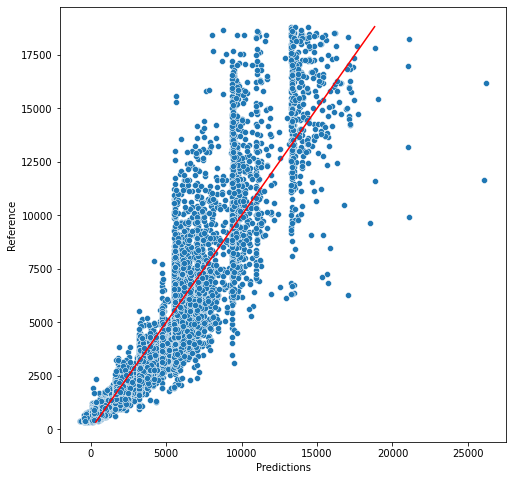

In [ ]:
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_abs_perc_error(y_true, y_pred)}
        """
    )
    
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_abs_perc_error(y_true, y_pred)
    }

mod_res['1st_iter'] = plot_predictions(y_test, results['predictions'])

Have this errors a normal distribution?

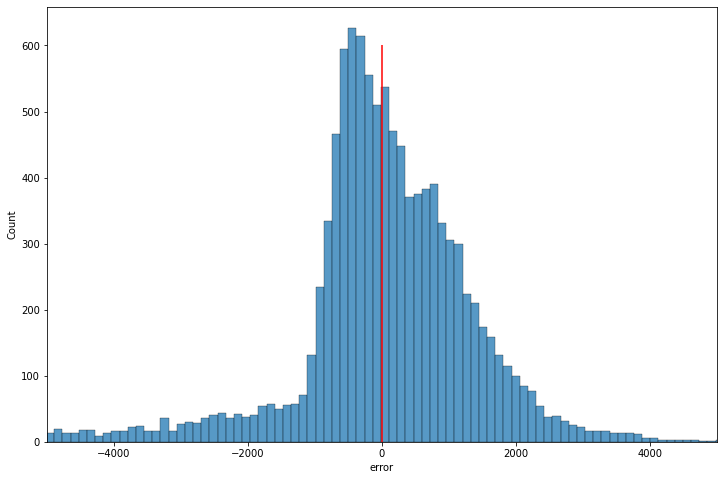

In [ ]:
p_df = results.assign(error = lambda x: x['predictions'] - x['true_values'])

plt.subplots(figsize=(12, 8))
sns.histplot(p_df['error'])
plt.vlines(x=0, ymin=0, ymax=600, color='red')
# big problems with outliers
plt.xlim(-5000, 5000)
plt.show()
# skewness to the right, my model tend to predict a higer price then it should be

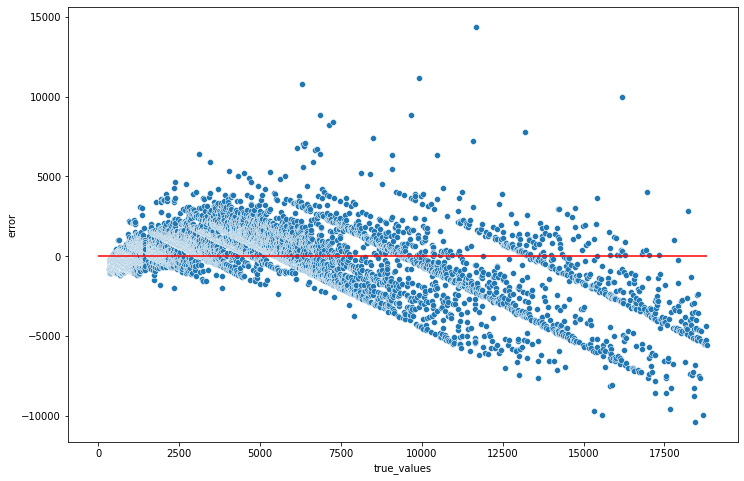

In [ ]:
# another way to visualise our errors
p_df = p_df.sort_values(by='true_values')

plt.subplots(figsize=(12, 8))
sns.scatterplot(data=p_df, x='true_values', y='error')
plt.hlines(y=0, xmin=0, xmax=max(p_df['true_values']), color='red')
plt.show()

We can also detect that our model tend to predict worse as the diamonds get more expensive. Maybe we are missing some kind of qualities there. 

## 2nd iteration: Sklearn pipeline + all features

In [ ]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
34530,0.33,Ideal,G,VVS1,62.0,56.0,4.45,4.48,2.77
26173,2.00,Very Good,I,VS2,59.5,62.0,8.13,8.21,4.86
20038,0.30,Good,H,SI1,63.4,58.0,4.21,4.24,2.68
41661,0.54,Ideal,J,VVS1,62.2,54.0,5.23,5.25,3.26
42306,0.41,Premium,D,VVS2,62.5,58.0,4.72,4.75,2.96


In [ ]:
#from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score



X = diamonds.drop(columns=['price'])
y = diamonds['price']


# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# building the pipeline
X_cat = X_train.select_dtypes(exclude="number").copy()
X_num = X_train.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

In [ ]:
y_train

13361      419
18592     7587
46843     1811
29633      442
23002    11060
         ...  
15377      606
17730     7137
28030      658
15725     6290
52734     2559
Name: price, Length: 43152, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

full_pipeline = make_pipeline(preprocessor, 
                              LinearRegression())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"]
}

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)
 

print(
        f"""
        MSE: {mean_squared_error(search.predict(X_test), y_test)}
        RMSE: {mean_squared_error(search.predict(X_test), y_test)**0.5}
        MAE: {mean_absolute_error(search.predict(X_test), y_test)}
        MAPE: {mean_absolute_percentage_error(search.predict(X_test), y_test)}
        R2 Score: {r2_score(y_test, search.predict(X_test))}
        """
    )

Fitting 5 folds for each of 2 candidates, totalling 10 fits

        MSE: 1292038.775704112
        RMSE: 1136.6788357773326
        MAE: 744.0058894984169
        MAPE: 1.254224372747079
        R2 Score: 0.9119484663251349
        R2 Score: 0.9186416642686037
        


In [ ]:
from sklearn.tree import DecisionTreeRegressor

full_pipeline = make_pipeline(preprocessor, 
                              DecisionTreeRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2) 
}

dt_search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

dt_search.fit(X_train, y_train)
 

scores = {"dtree" : search.best_score_}

scores

print(
    
    #mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


        f"""
        MSE: {mean_squared_error(dt_search.predict(X_test), y_test)}
        RMSE: {mean_squared_error(dt_search.predict(X_test), y_test)**0.5}
        MAE: {mean_absolute_error(dt_search.predict(X_test), y_test)}
        MAPE: {mean_absolute_percentage_error(dt_search.predict(X_test), y_test)}
        R2 Score: {r2_score(dt_search.predict(X_test), y_test)}
        """
    )

Fitting 5 folds for each of 60 candidates, totalling 300 fits

        MSE: 426781.77226735966
        RMSE: 653.2853681717964
        MAE: 346.3775643635926
        MAPE: 0.09495159039364746
        R2 Score: 0.9730061695967279
        


In [ ]:
# solution
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_full_pipeline = make_pipeline(preprocessor,
                                  KNeighborsRegressor()
                                 )


param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsregressor__n_neighbors": range(2, 6),
    "kneighborsregressor__weights": ["uniform", "distance"]
}

knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

knn_search.fit(X_train, y_train)

knn_search.best_score_

print(

        f"""
        MSE: {mean_squared_error(knn_search.predict(X_test), y_test)}
        RMSE: {mean_squared_error(knn_search.predict(X_test), y_test)**0.5}
        MAE: {mean_absolute_error(knn_search.predict(X_test), y_test)}
        MAPE: {mean_absolute_percentage_error(knn_search.predict(X_test), y_test)}
        R2 Score: {r2_score(knn_search.predict(X_test), y_test)}
        """
    )

Fitting 5 folds for each of 16 candidates, totalling 80 fits

        MSE: 783313.5755473598
        RMSE: 885.0500412673623
        MAE: 455.18815282587985
        MAPE: 0.1232924367302352
        R2 Score: 0.9453467799512547
        


In [ ]:

def plot_predictions(y_true, y_pred): 
    
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    errors = y_pred - y_true
    plt.subplots(figsize=(12, 8))
    sns.histplot(errors)
    plt.vlines(x=0, ymin=0, ymax=600, color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    p_df = (
        pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
        .assign(error = lambda x: x['y_pred'] - x['y_true'])
        .sort_values(by='y_true')
        )

    plt.subplots(figsize=(12, 8))
    sns.scatterplot(data=p_df, x='y_true', y='error')
    plt.hlines(y=0, xmin=0, xmax=max(p_df['y_true']), color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

# *Apply* the models above into the hosuing dataset below, Predict SalePrice

In [ ]:
url = "https://drive.google.com/file/d/1JSY5fef1_9HlKZl1JRLTTa1kcxMNQA3Z/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = df = pd.read_csv(path)

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




X = data.drop(columns=['SalePrice'])
y = data['SalePrice']


# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)



# building the pipeline
X_cat = X_train.select_dtypes(exclude="number").copy()
X_num = X_train.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

full_pipeline = make_pipeline(preprocessor, 
                              LinearRegression())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"]
}

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)
 

print(
        f"""
        MSE: {mean_squared_error(search.predict(X_test), y_test)}
        RMSE: {mean_squared_error(search.predict(X_test), y_test)**0.5}
        MAE: {mean_absolute_error(search.predict(X_test), y_test)}
        MAPE: {mean_absolute_percentage_error(search.predict(X_test), y_test)}
        R2 Score: {r2_score(search.predict(X_test), y_test)}
        """
    )

Fitting 5 folds for each of 2 candidates, totalling 10 fits

        MSE: 669787903.3179512
        RMSE: 25880.260881953087
        MAE: 16833.47515649479
        MAPE: 0.09678190214322843
        R2 Score: 0.8742953711080838
        


700261.8764251312 34900


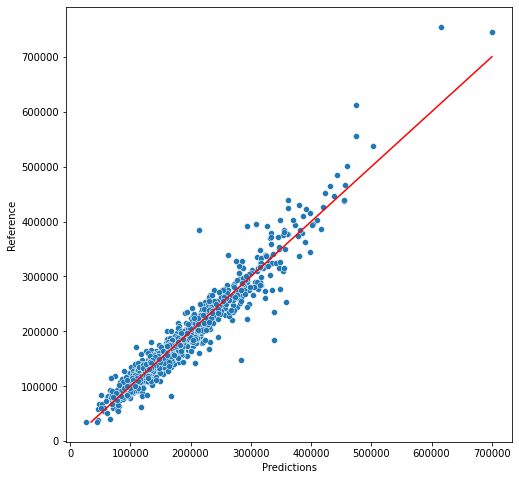

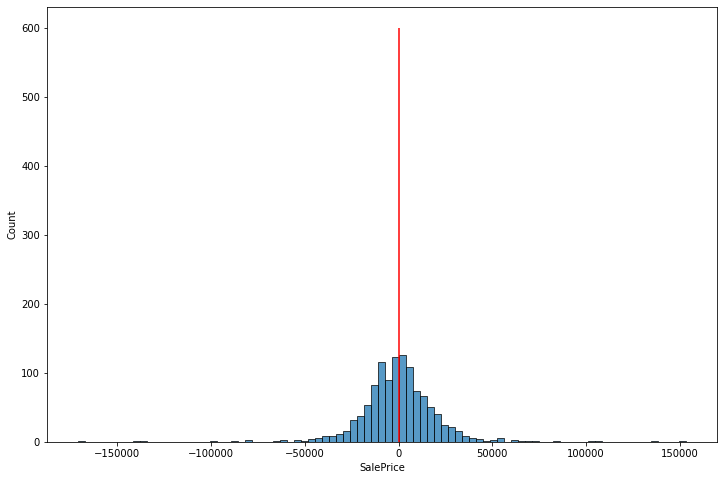

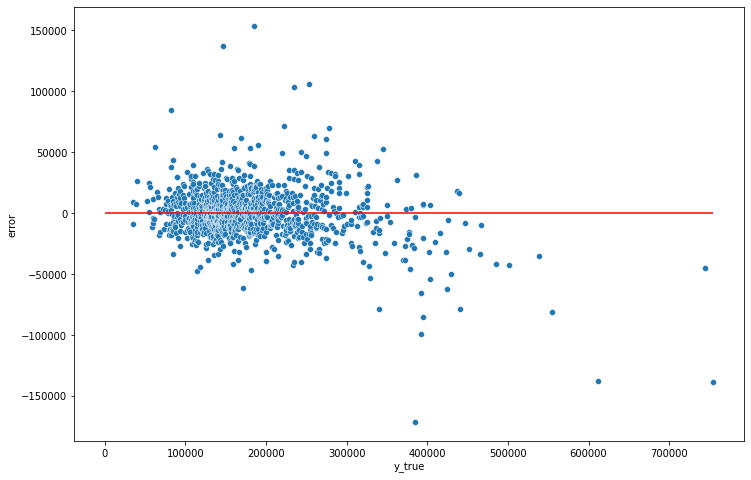

In [ ]:
plot_predictions(y_train, search.predict(X_train))

In [ ]:
from sklearn.tree import DecisionTreeRegressor

full_pipeline = make_pipeline(preprocessor, 
                              DecisionTreeRegressor())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2) 
}

dt_search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

dt_search.fit(X_train, y_train)
 

scores = {"dtree" : dt_search.best_score_}

scores

print(
    
    #mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


        f"""
        MSE: {mean_squared_error(dt_search.predict(X_test), y_test)}
        RMSE: {mean_squared_error(dt_search.predict(X_test), y_test)**0.5}
        MAE: {mean_absolute_error(dt_search.predict(X_test), y_test)}
        MAPE: {mean_absolute_percentage_error(dt_search.predict(X_test), y_test)}
        R2 Score: {r2_score(dt_search.predict(X_test), y_test)}
        """
    )

TypeError: ignored

703885.6666666666 71762.42857142857


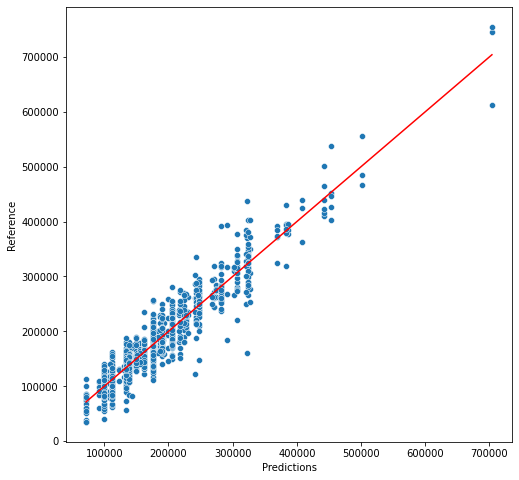

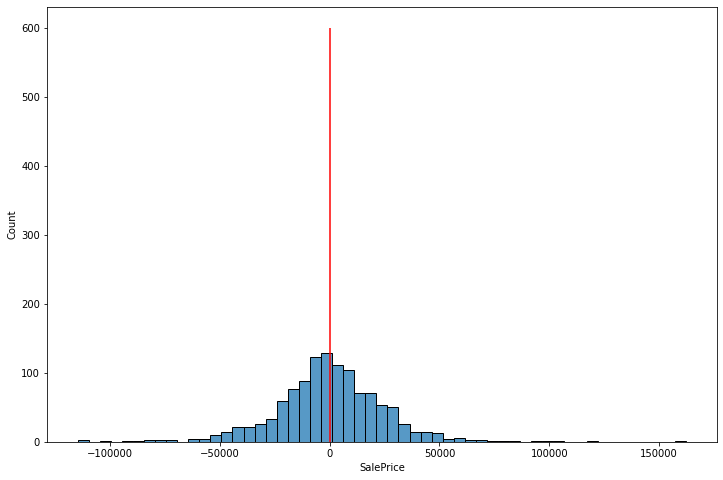

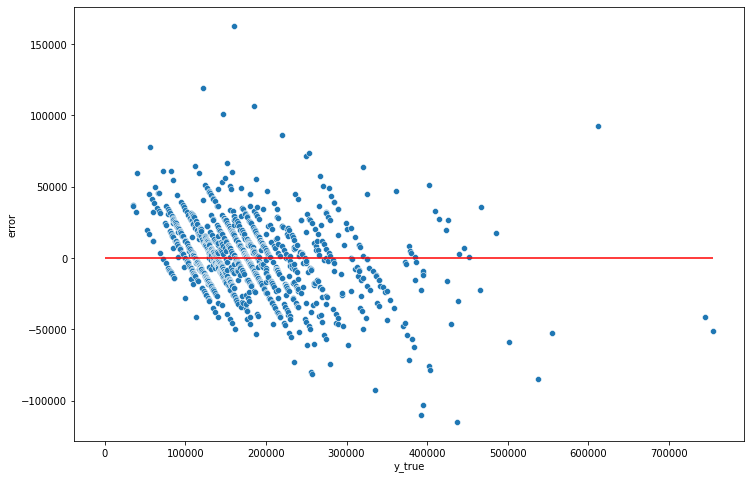

In [ ]:
plot_predictions(y_train, dt_search.predict(X_train))

In [ ]:
#from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# building the pipeline
X = X.select_dtypes(include="number").copy()

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns)#,
       # ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
full_pipeline = make_pipeline(preprocessor, 
                              StandardScaler(),
                              pca,
                              DecisionTreeRegressor())


full_pipeline.fit(X_train, y_train)

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2) 
}

dt_search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

dt_search.fit(X_train, y_train)
 

scores = {"dtree" : dt_search.best_score_}

scores

print(
    
    #mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


        f"""
        MSE: {mean_squared_error(dt_search.predict(X_test), y_test)}
        RMSE: {mean_squared_error(dt_search.predict(X_test), y_test)**0.5}
        MAE: {mean_absolute_error(dt_search.predict(X_test), y_test)}
        MAPE: {mean_absolute_percentage_error(dt_search.predict(X_test), y_test)}
        R2 Score: {r2_score(dt_search.predict(X_test), y_test)}
        """
    )

Fitting 5 folds for each of 60 candidates, totalling 300 fits

        MSE: 2077452864.2098005
        RMSE: 45579.083626262174
        MAE: 31470.632560774124
        MAPE: 0.173985526552555
        R2 Score: 0.4012752372797095
        


In [ ]:
pca = PCA(n_components=6) 
pca.fit(X_train.fillna(X_train.mean())) # Scale the data first
pca.explained_variance_ratio_

array([0.9800511 , 0.00580186, 0.00379889, 0.0033428 , 0.00317191,
       0.00197817])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
318,319,60,90.0,9900,7,5,1993,1993,256.0,987,...,656,340,60,144,0,0,0,0,4,2009
580,581,20,NaN,14585,6,6,1960,1987,85.0,594,...,572,216,110,0,0,0,0,0,6,2007
961,962,60,NaN,12227,6,7,1977,1995,424.0,896,...,619,550,282,0,0,0,0,0,7,2008
78,79,90,72.0,10778,4,5,1968,1968,0.0,0,...,0,0,0,0,0,0,0,0,4,2010
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,480,40,30,0,320,0,0,700,10,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1042,60,NaN,9130,6,8,1966,2000,252.0,400,...,484,0,40,0,0,0,0,0,7,2008
1122,1123,20,NaN,8926,4,3,1956,1956,0.0,0,...,288,64,0,0,0,160,0,0,10,2009
1346,1347,20,NaN,20781,7,7,1968,2003,0.0,297,...,508,0,80,0,290,0,0,0,6,2006
1406,1407,85,70.0,8445,5,7,1972,2007,0.0,656,...,396,58,0,0,0,0,0,0,3,2009


In [ ]:
#from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




X = data.drop(columns=['SalePrice'])
y = data['SalePrice']


# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)



# building the pipeline
X_cat = X_train.select_dtypes(exclude="number").copy()
X_num = X_train.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)




In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
full_pipeline = make_pipeline(preprocessor,
                              StandardScaler(),
                              pca,
                              DecisionTreeRegressor())


full_pipeline.fit(X_train, y_train)

param_grid = {
    #"pca__n_components": [1, 2, 5, 7, 8],
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2) 
}

dt_search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

dt_search.fit(X_train, y_train)
 

scores = {"dtree" : dt_search.best_score_}

scores

print(
    
    #mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


        f"""
        MSE: {mean_squared_error(dt_search.predict(X_test), y_test)}
        RMSE: {mean_squared_error(dt_search.predict(X_test), y_test)**0.5}
        MAE: {mean_absolute_error(dt_search.predict(X_test), y_test)}
        MAPE: {mean_absolute_percentage_error(dt_search.predict(X_test), y_test)}
        R2 Score: {r2_score(dt_search.predict(X_test), y_test)}
        """
    )

Fitting 5 folds for each of 300 candidates, totalling 1500 fits

        MSE: 1117511361.420811
        RMSE: 33429.19923391542
        MAE: 22750.913365579894
        MAPE: 0.12214633913438588
        R2 Score: 0.8009929159287921
        


## Apply scalling or normalization on the data e,g,m MinMax
## Try different ML models e.g., RandomForest, LinearRegression, etc
